# Method and Dataset Used
DATASET | Netflix Movies and TV Shows: https://www.kaggle.com/shivamb/netflix-shows

METHOD | DECISION TREE (Machine Learning)



# Data Exploration
Clean the NaN values, visualize the dataset and group the data by year, country and genre.

In [ ]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
import os
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg

%matplotlib inline

In [ ]:
data = pd.read_csv(join(path_prefix,"netflix_titles.csv"))
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...


In [ ]:
print("Length of the dataframe: "+str(len(data)))
print("Null variable counts by column names: ")
data.isnull().sum()

Length of the dataframe: 6234
Null variable counts by column names: 


show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#replace the NaN values with either 0 or an empty string, depending on the data type
data.fillna({'director':""}, inplace=True)
data.fillna({'cast':""}, inplace=True)
data.fillna({'country':""}, inplace=True)
data.fillna({'date_added':""}, inplace=True)
data.fillna({'rating':""}, inplace=True)
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#check the dataframe to see if replacement is successful
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


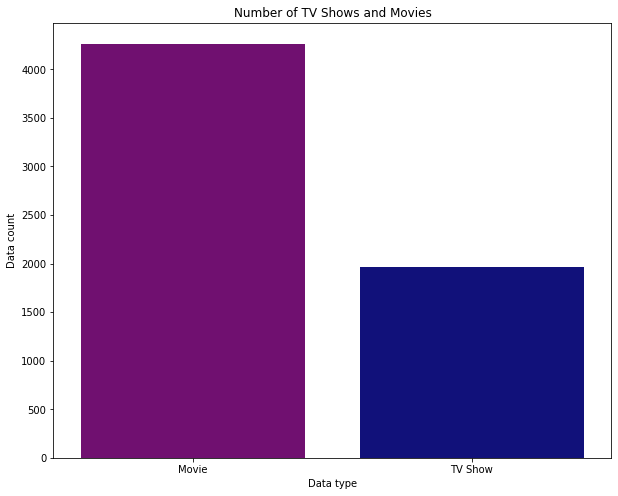

In [ ]:
plt.figure(figsize=(10,8))
colorSet={"purple","darkBlue"}
ax=sns.countplot(x="type",data=data,palette=colorSet)
ax.set_xlabel("Data type")
ax.set_ylabel("Data count")
ax.set_title("Number of TV Shows and Movies")
plt.show()

As shown in the graph, two thirds of total TV shows and Movies are Movies and the rest are TV shows.

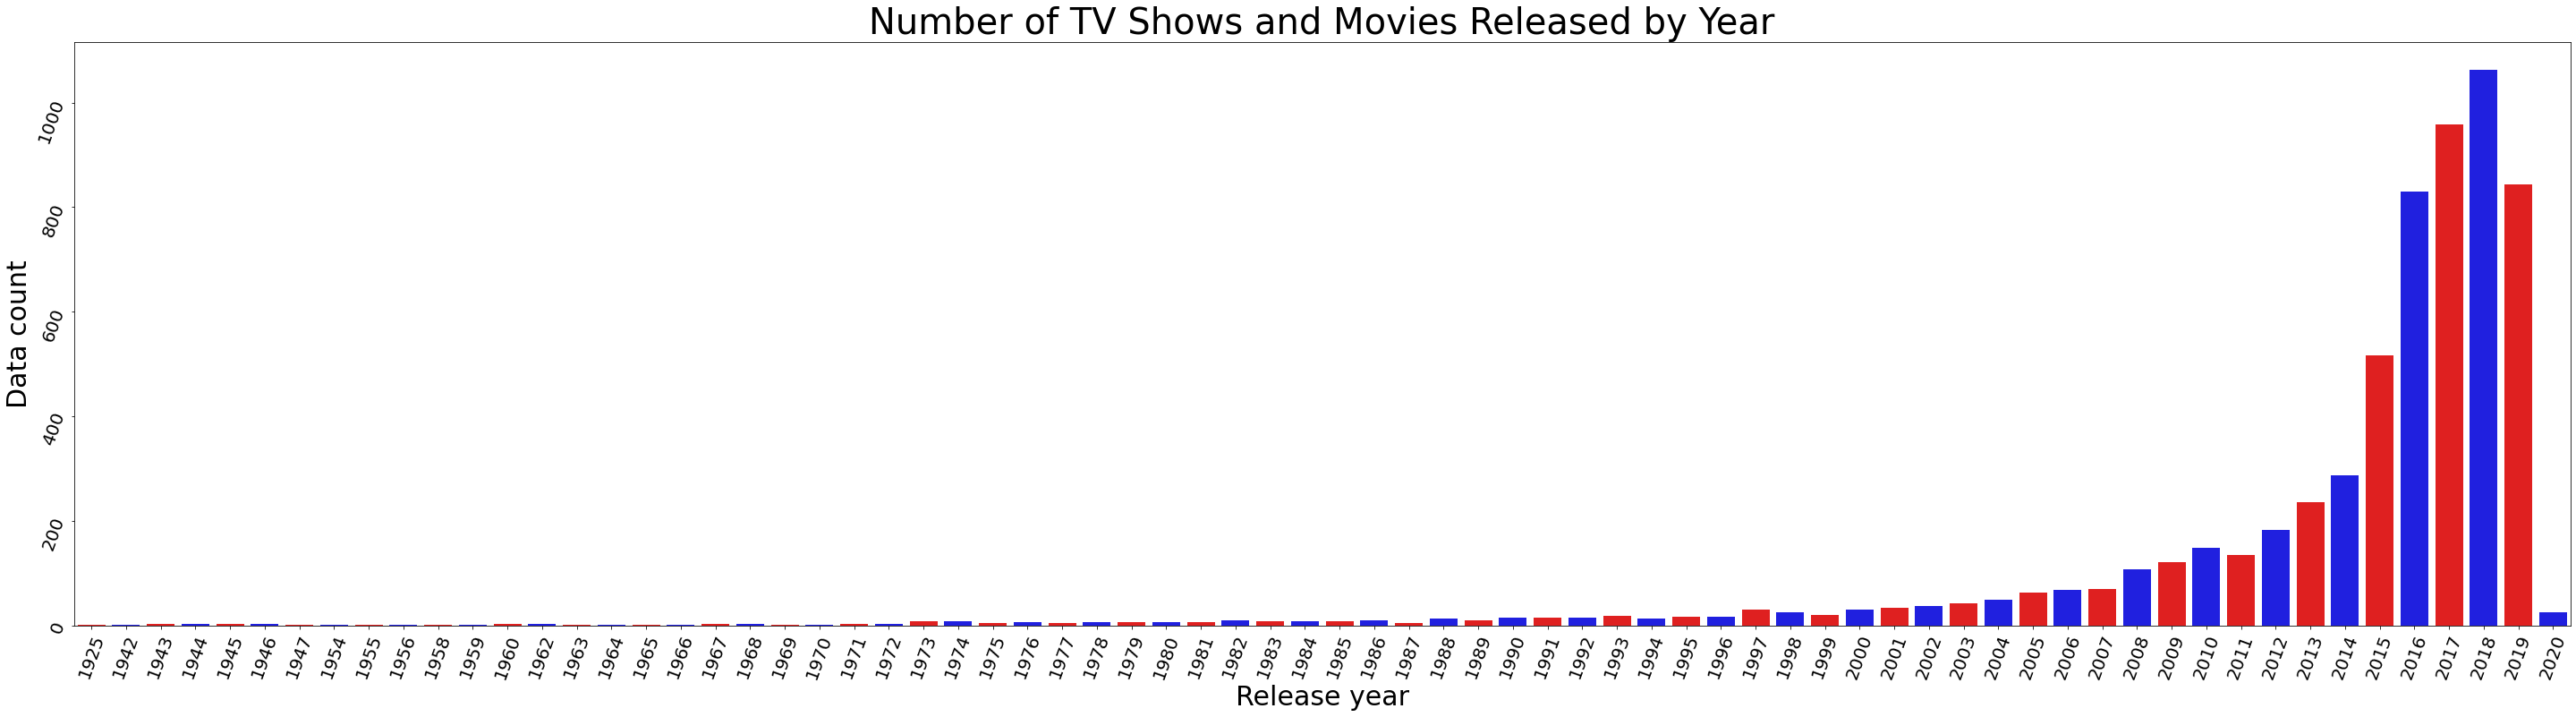

In [ ]:
plt.figure(figsize=(50,12))
labels=[]
for elem in data["release_year"]:
  if elem not in labels:
    labels.append(elem)
labels.sort()
colorSet={"red","blue"}
ax=sns.countplot(x="release_year",data=data,palette=colorSet)
ax.set_xlabel("Release year",size=30)
ax.set_ylabel("Data count",size=30)
ax.set_xticklabels(labels, rotation=70,size=20)
ax.set_yticklabels([elem*200 for elem in range(0,6)], rotation=70,size=20)
ax.set_title("Number of TV Shows and Movies Released by Year",size=40)
plt.show()

At around the 2015 mark, there has been a leap in the number of TV shows and Movies. We can interpret this as the amount of TV shows and Movies in Netflix has risen at around 2015, and therefore it's popularity has been increasing.

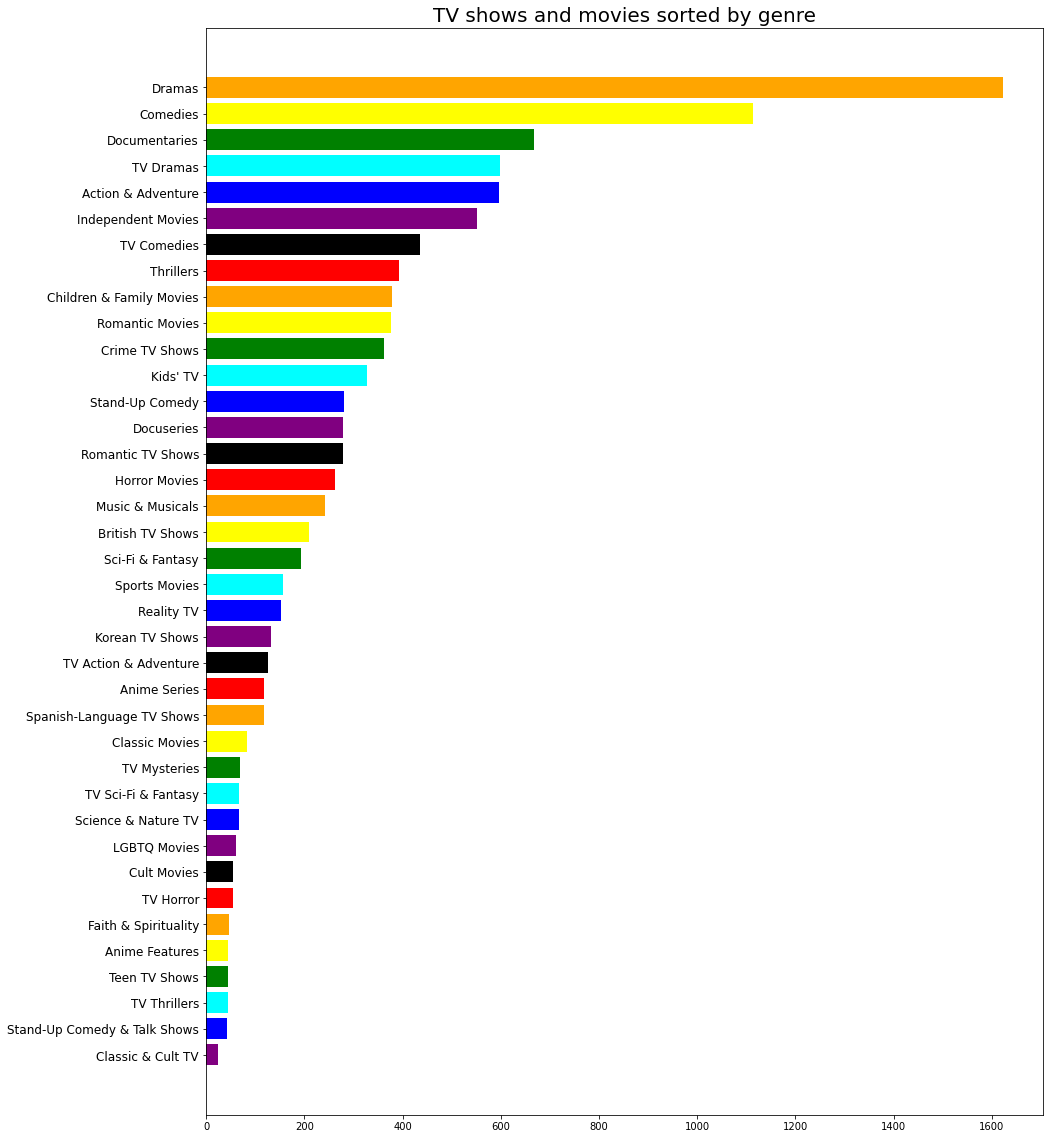

In [ ]:
current=0
dict1={}
list2=[]
labels=[]
for elem in data["listed_in"]:

  asd=data["listed_in"].iloc[current]
  list1=asd.split(',')
  for elem in list1:
    a=elem.strip(' ')
    if a not in dict1:
      dict1[a]=1
    elif a in dict1:
      dict1[a]=dict1[a]+1
    if a not in labels:
      labels.append(a)
  current+=1
del dict1["Movies"]
del dict1["International Movies"]
del dict1["International TV Shows"]
del dict1["TV Shows"]
sortedDict={key: value for key, value in sorted(dict1.items(), key=lambda item: item[1])}
plt.figure(figsize=(15,20))
palette=["purple","blue","cyan","green","yellow","orange","red","black"]
plt.barh(range(len(sortedDict)), list(sortedDict.values()), align='center',color=palette)
plt.yticks(range(len(sortedDict)), list(sortedDict.keys()),size=12)
plt.title("TV shows and movies sorted by genre",size=20)
plt.show()

The amount of Drama Movies and TV shows are dominating the rest of the genres, followed by Comedy.

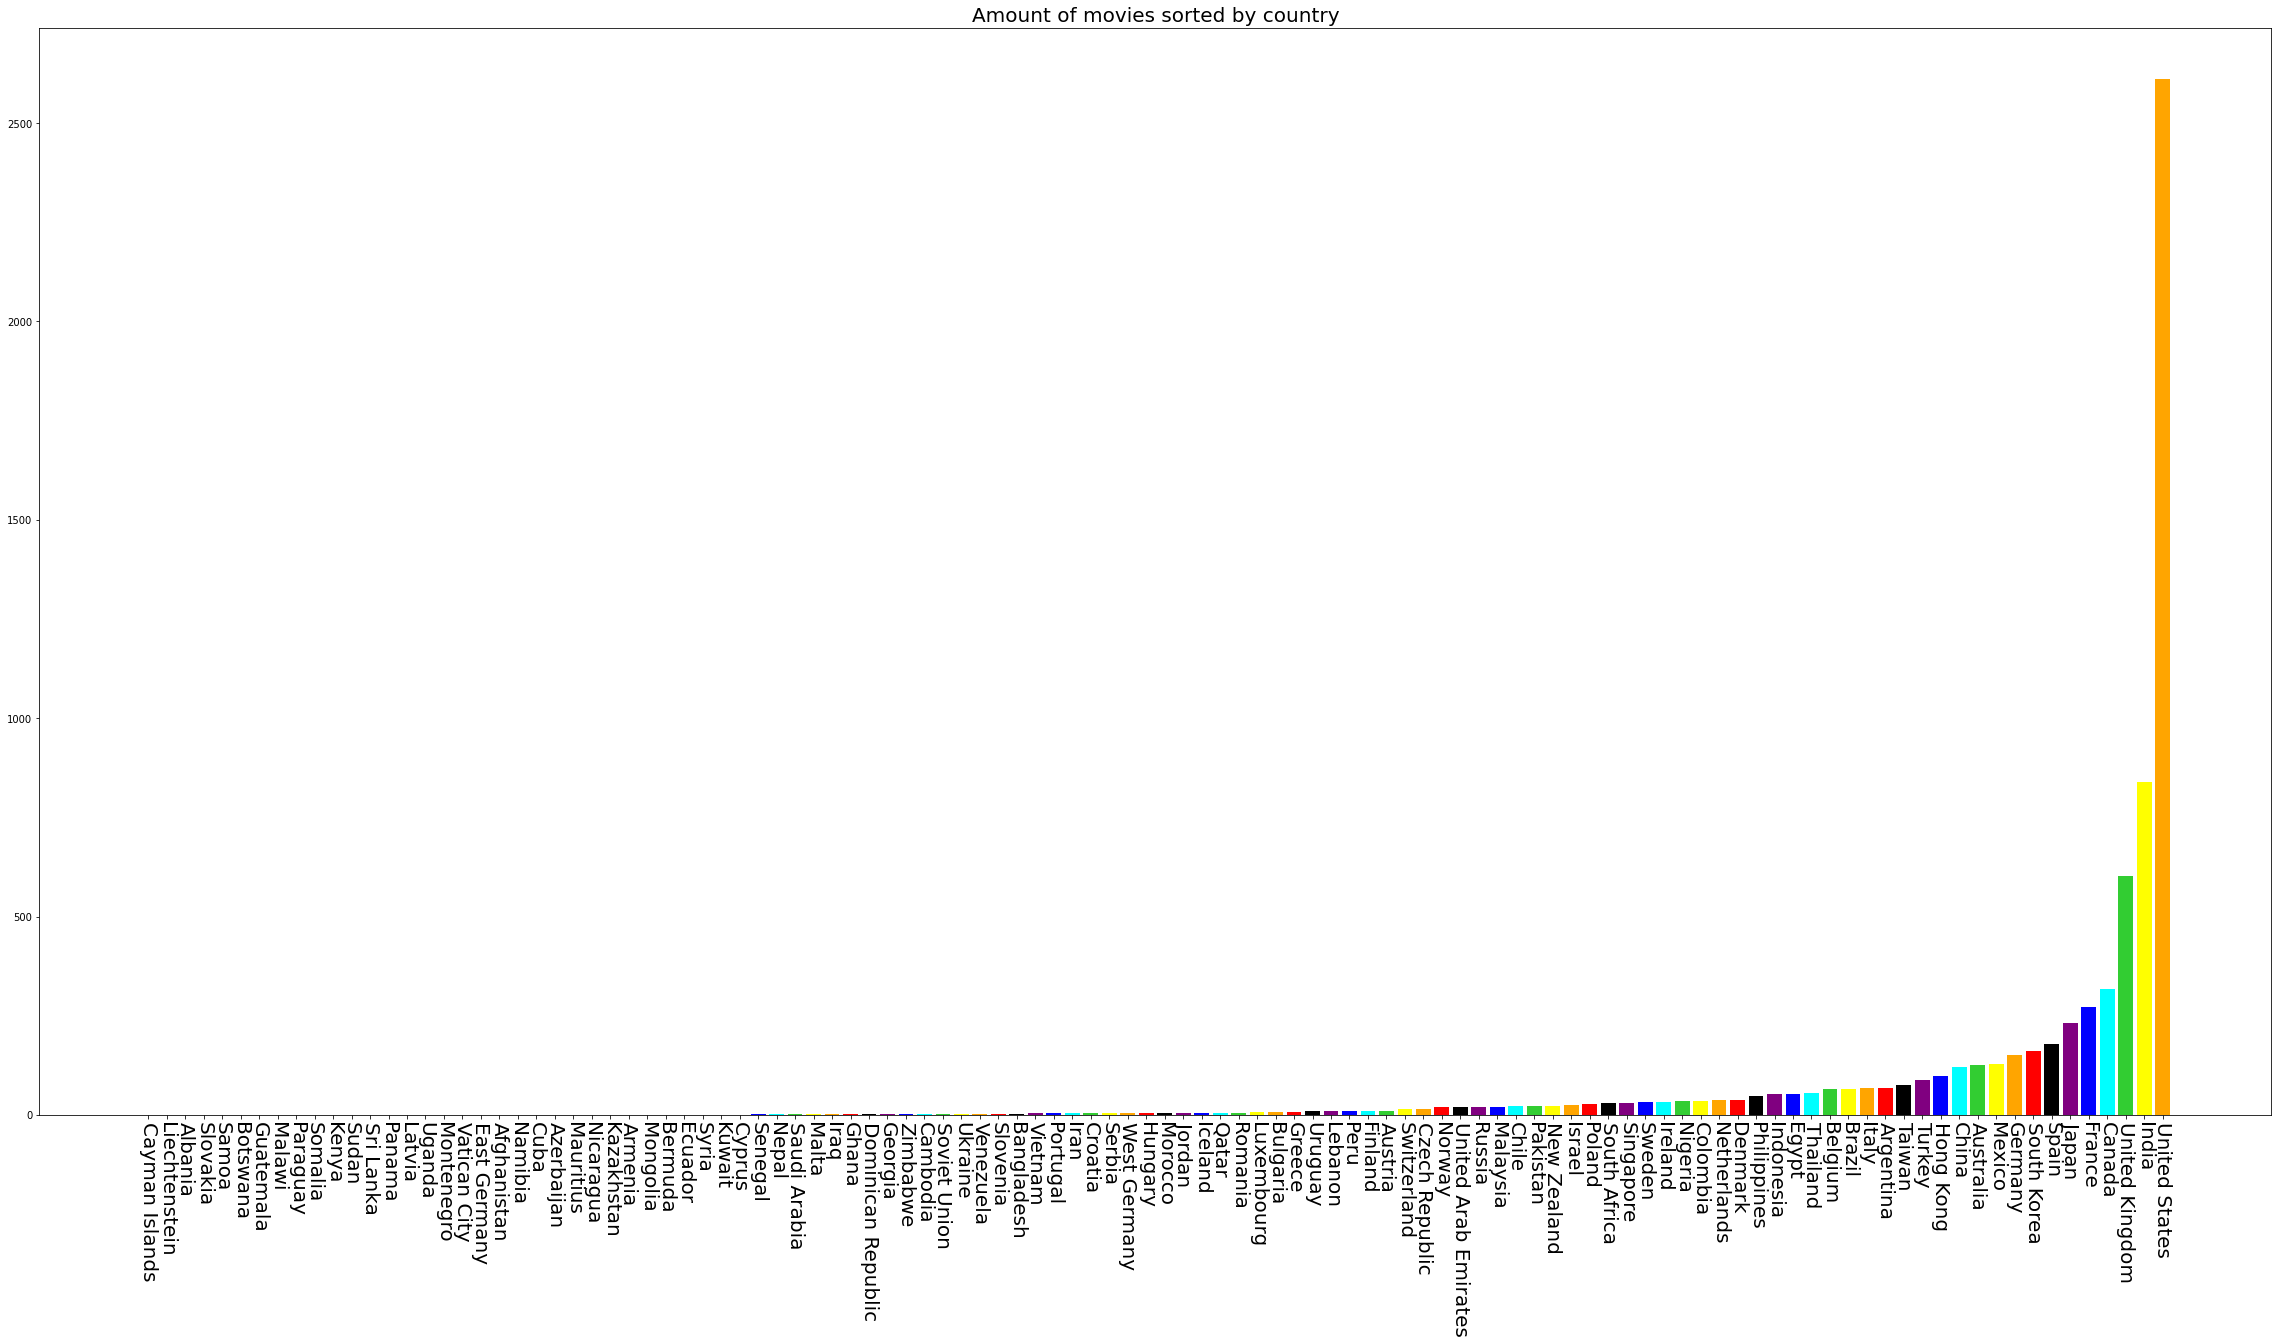

In [ ]:
current=0
dict1={}
list2=[]
labels=[]
for elem in data["country"]:
  
  asd=data["country"].iloc[current]
  list1=asd.split(',')
  for elem in list1:
    if len(elem)>0:
      a=elem.strip(' ')
      if a not in dict1:
        dict1[a]=1
      elif a in dict1:
        dict1[a]=dict1[a]+1
      if a not in labels:
        labels.append(a)
  current+=1
sortedDict={key: value for key, value in sorted(dict1.items(), key=lambda item: item[1])}
plt.figure(figsize=(40,20))
palette=["purple","blue","cyan","limeGreen","yellow","orange","red","black"]
plt.bar(range(len(sortedDict)), list(sortedDict.values()), align='center',color=palette)
plt.xticks(range(len(sortedDict)), list(sortedDict.keys()),size=20,rotation=-90)
plt.title("Amount of movies sorted by country",size=20)
plt.show()

As seen in the graph, the country that produces the most amount of TV shows and Movies is United States, and it is almost 2 times more than the second country, India.

In [ ]:
emptyList=list()
emptyList2=list()
with open(join(path_prefix,"coordinates.txt")) as opo:
  emptyList=opo.readlines()
for i in emptyList:
  b=i.rstrip("\n")
  c=b.split("\t")
  emptyList2.append(c)

In [ ]:
def longi(listem,ulke):
  for z in listem:
    if(z[3]==ulke):
      return float(z[2])

def lati(listem,ulke):
  for z in listem:
    if(z[3]==ulke):
      return float(z[1])

import csv

with open('coordinates.csv', 'w', newline='') as file:
    fieldnames = ['latitude', 'longitude']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for (i,j) in sortedDict.items():
      longg=longi(emptyList2,i)
      latii=lati(emptyList2,i)
      if (isinstance(longg,float) and isinstance(latii,float)):
        for key in range(sortedDict[i]):
          writer.writerow({'latitude': latii, 'longitude': longg})
          latii+=0.000001
          longg+=0.000001

In [ ]:
dataframeee = pd.read_csv("coordinates.csv")
print(len(dataframeee))
dataframeee.head(7170)

7170


,latitude,longitude
0,19.513469,-80.566956
1,47.166000,9.555373
2,41.153332,20.168331
3,48.669026,19.699024
4,-13.759029,-172.104629
...,...,...
7165,37.092845,-95.710286
7166,37.092846,-95.710285
7167,37.092847,-95.710284
7168,37.092848,-95.710283


In [ ]:
import folium 
from folium.plugins import heat_map
latitude_mean = dataframeee['latitude'].mean()
longitude_mean = dataframeee['longitude'].mean()
map = folium.Map(location=[latitude_mean,longitude_mean], zoom_start = 5, tiles='Stamen Toner')

from folium.plugins import HeatMap
location=dataframeee[['latitude','longitude']].dropna()
location=np.unique(location,axis=0)
HeatMap(location,radius=25).add_to(map)
map
#HEAT MAP

The weighted heatmap of countries based on the number of TV shows and movies

In [ ]:
import folium.plugins as plugins
# Map of countries with number of movies and TV shows.
plugins.MarkerCluster(location).add_to(map)
map

The number of TV shows and Movies shot in North America is more than the ones in Europe, but in Europe there are many different countries so it appears more heated.

# Machine Learning Models
Decision tree to determine the ratings of TV shows and Movies based on their types and release years.



## Implementation

In [ ]:
#created a list to give each rating a specific number, to later replace in dataset
listRating=[]
for elem in data["rating"]:
  if elem not in listRating and len(elem)>0:
    listRating.append(elem)

In [ ]:
#replaced rating column with numeric values to use in decision tree
current=0
listRD={}
for elem in listRating:
  listRD[elem]=current
  current+=1
#listRD
data["rating"] = data["rating"].map(listRD)
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,0.0,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,1.0,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,2.0,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,3.0,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,4.0,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [ ]:
#replace movies with 0 and tv shows with 1, we need numerical values to create decision tree
replaceType={"Movie":0,"TV Show":1}
data["type"]=data["type"].map(replaceType)
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,0.0,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,0,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,1.0,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,1,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,2.0,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,1,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,3.0,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,0,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,4.0,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [ ]:
data.fillna({"release_year":0}, inplace=True)
takenColumn=["type"]
dframe=data[takenColumn]
data.fillna({"rating":0}, inplace=True)
target=data["rating"]

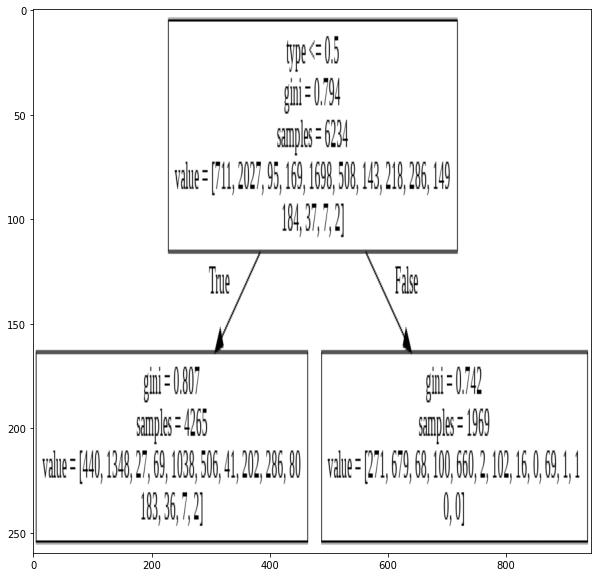

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(dframe, target)
dataGraph = tree.export_graphviz(dtree, out_file=None, feature_names=takenColumn)
graph = pydotplus.graph_from_dot_data(dataGraph)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')

plt.figure(figsize = (10,10))
plt.imshow(img,aspect='auto') #,aspect='auto' imgplot = 
plt.show() 

In [ ]:
#data.fillna({"release_year":0}, inplace=True)
takenColumn=["type","release_year"]
dframe=data[takenColumn]
#data.fillna({"rating":0}, inplace=True)
target=data["rating"]

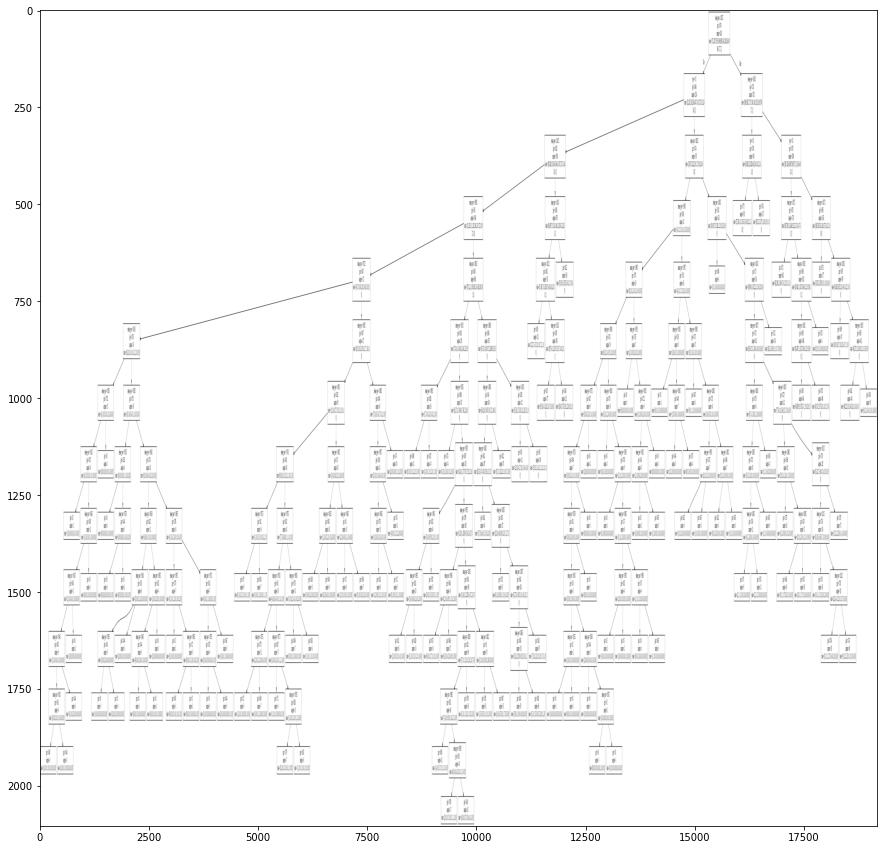

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(dframe, target)
dataGraph2 = tree.export_graphviz(dtree, out_file=None, feature_names=takenColumn)
graph = pydotplus.graph_from_dot_data(dataGraph2)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')

plt.figure(figsize = (15,15))
plt.imshow(img,aspect='auto') #,aspect='auto' imgplot = 
plt.show() 